In [99]:
# Importing the yfinance library to fetch financial data from Yahoo Finance
# Importing matplotlib for plotting and visualizing the data
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import os

In [100]:
# Creating a Ticker object for the S&P 500 index using respecive ticker symbols
sp500 = yf.Ticker("^GSPC")

In [101]:
# Fetching the historical data for the S&P 500 index and Apple Inc. for the maximum available period
sp500 = sp500.history(period="max")

In [102]:
# Displaying the data of S&P 500
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,0.0,0.0
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,0.0,0.0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,0.0,0.0


In [103]:
# Accessing the index of the S&P 500 historical data, which contains the dates for the data points
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-07 00:00:00-04:00', '2024-05-08 00:00:00-04:00',
               '2024-05-09 00:00:00-04:00', '2024-05-10 00:00:00-04:00',
               '2024-05-13 00:00:00-04:00', '2024-05-14 00:00:00-04:00',
               '2024-05-15 00:00:00-04:00', '2024-05-16 00:00:00-04:00',
               '2024-05-17 00:00:00-04:00', '2024-05-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24212, freq=None)

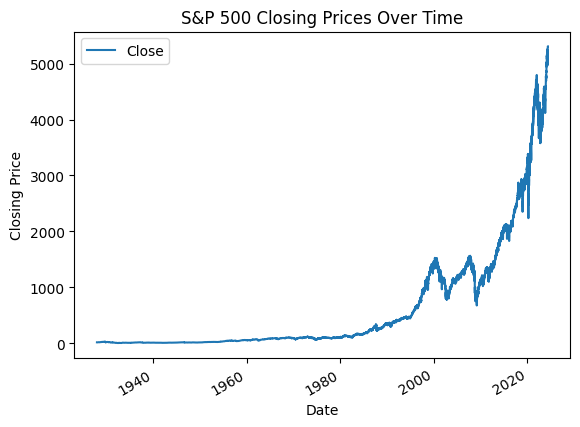

In [104]:
# Plot S&P 500 data
sp500.plot.line(y="Close", use_index=True)
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [105]:
# Removing the 'Dividends' & 'Stock Splits' column from the S&P 500 historical data as it is not needed
# removed divedends and stock splits  because they are useful for individual stocks not an index fund
del sp500["Dividends"]
del sp500["Stock Splits"]

In [106]:
# Creating a new column 'Tomorrow' in the S&P 500 historical data by shifting the 'Close' prices one day back
# Directionality of the stock price is more important than the absolute price value
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020


In [107]:
# Creating a new column 'Target' in the S&P 500 historical data
# The 'Target' column is 1 if the 'Tomorrow' price is higher than the 'Close' price, otherwise 0
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020,1


In [108]:
# Filtering the S&P 500 historical data to include only data from January 1, 1990, onwards
# Creating a copy of this filtered data to avoid modifying the original DataFrame
# TODO remove timestamp
#
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020,1


In [174]:
# Importing the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Initializing the RandomForestClassifier with specified hyperparameters
# n_estimators=250: Number of trees in the forest
# min_samples_split=100: Minimum number of samples required to split an internal node
# random_state=1: Setting the random seed for reproducibility
# RandomForestModel can pick up on non linear relationships
# Changed number of decision trees to gain better accuracy
# Setting min sample split helps avoid overfitting
# Random state = 1, keeps the seed value 1 ensuring same results when rerunning the model
model = RandomForestClassifier(n_estimators=250, min_samples_split=100, random_state=1)

# Splitting the S&P 500 data into training and testing sets
# The training set consists of all data except the last 100 rows
# The testing set consists of the last 100 rows
train = sp500.iloc[:-200]
test = sp500.iloc[-200:]

# ^ Simple baseline model

print(train["Target"].value_counts())
print(test["Target"])


# Defining the list of predictor variables to be used for training the model
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Fitting the RandomForestClassifier model on the training data
# Using the predictors to predict the 'Target' variable
model.fit(train[predictors], train["Target"])


Target
1    2943
0    2518
Name: count, dtype: int64
Date
2023-08-03 00:00:00-04:00    0
2023-08-04 00:00:00-04:00    1
2023-08-07 00:00:00-04:00    0
2023-08-08 00:00:00-04:00    0
2023-08-09 00:00:00-04:00    1
                            ..
2024-05-13 00:00:00-04:00    1
2024-05-14 00:00:00-04:00    1
2024-05-15 00:00:00-04:00    0
2024-05-16 00:00:00-04:00    1
2024-05-17 00:00:00-04:00    1
Name: Target, Length: 200, dtype: int64


RandomForestClassifier(min_samples_split=100, n_estimators=250, random_state=1)

In [175]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [176]:
preds = pd.Series(preds, index=test.index)
# precision_score(test["Target"], preds)
preds

Date
2023-08-03 00:00:00-04:00    0
2023-08-04 00:00:00-04:00    1
2023-08-07 00:00:00-04:00    1
2023-08-08 00:00:00-04:00    1
2023-08-09 00:00:00-04:00    1
                            ..
2024-05-13 00:00:00-04:00    0
2024-05-14 00:00:00-04:00    0
2024-05-15 00:00:00-04:00    0
2024-05-16 00:00:00-04:00    0
2024-05-17 00:00:00-04:00    0
Length: 200, dtype: int64

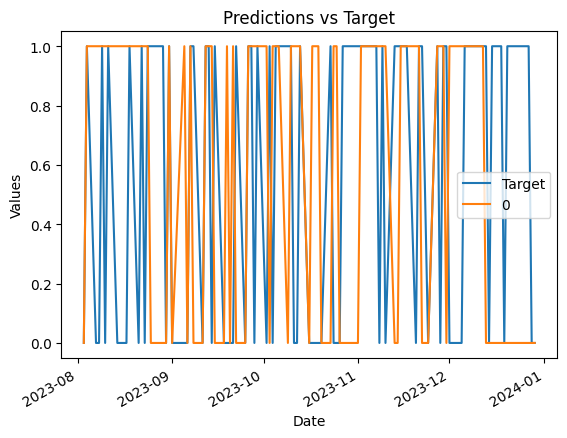

In [177]:
#TEST
combined = pd.concat([test["Target"], preds], axis=1)

start_date = "2023-05-01"
end_date = "2024-01-01"
filtered_combined = combined.loc[start_date:end_date]

# Plot the filtered DataFrame
filtered_combined.plot()
plt.title('Predictions vs Target')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

In [178]:
precision_score(test["Target"], preds)

0.5238095238095238

<Axes: xlabel='Date'>

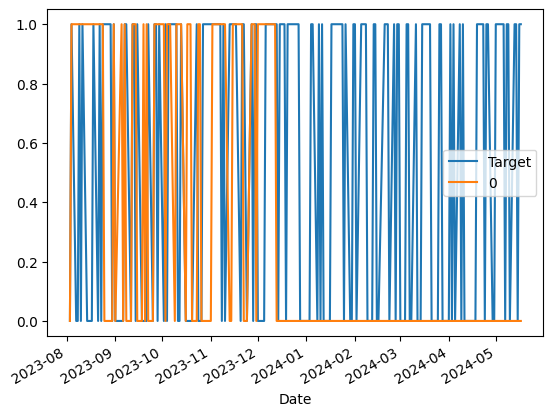

In [179]:
# TODO shorten dates
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [180]:
# So we are currently testing against the last 200 days
# We want to test across multiple years to enhance real world predictability
# Predict function is part of the backtesting capability
# this function fits, trains, and combines the results
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [181]:
# Each year has ~250 trading days, we are using 10 years worth of data
# Starts with 10 years of data to predict values for the 11th year and so on...

def backtest(data, model, predictors, start=2500, step=250):
    all_preddictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        predictions = predict(train, test, predictors, model)
        all_preddictions.append(predictions)
    return pd.concat(all_preddictions)

In [182]:
predictions = backtest(sp500, model, predictors)

In [183]:
predictions["Predictions"].value_counts()

Predictions
0    2166
1     434
Name: count, dtype: int64

In [184]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5414746543778802

In [212]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.53864
0    0.46136
Name: count, dtype: float64

In [186]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

/var/folders/55/f463lxj509l494063d8m9jqr0000gn/T/ipykernel_65082/10987703.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
/var/folders/55/f463lxj509l494063d8m9jqr0000gn/T/ipykernel_65082/10987703.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]


In [187]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2001-11-20 00:00:00-05:00,1151.060059,1152.449951,1142.170044,1142.660034,1330200000,1137.030029,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-21 00:00:00-05:00,1142.660034,1142.660034,1129.780029,1137.030029,1029300000,1150.339966,1,0.997530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-23 00:00:00-05:00,1137.030029,1151.050049,1135.900024,1150.339966,410300000,1157.420044,1,1.005819,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-26 00:00:00-05:00,1150.339966,1157.880005,1146.170044,1157.420044,1129800000,1149.500000,0,1.003068,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-27 00:00:00-05:00,1157.420044,1163.380005,1140.810059,1149.500000,1288000000,1128.520020,0,0.996567,1.0,1.001839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13 00:00:00-04:00,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,5246.680176,1,0.999879,1.0,1.002825,3.0,1.017942,30.0,1.122690,139.0,1.254150,531.0
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1,1.002413,1.0,1.005399,3.0,1.022066,31.0,1.127019,140.0,1.259524,531.0
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0,1.005824,2.0,1.012503,4.0,1.032924,32.0,1.139098,140.0,1.273572,531.0


In [188]:
sp500 = sp500.dropna()

In [189]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2005-11-09 00:00:00-05:00,1218.589966,1226.589966,1216.530029,1220.650024,2214460000,1230.959961,1,1.000845,1.0,1.000184,4.0,1.007948,32.0,1.018560,138.0,1.141022,523.0
2005-11-10 00:00:00-05:00,1220.650024,1232.410034,1215.050049,1230.959961,2378460000,1234.719971,1,1.004205,2.0,1.006813,4.0,1.016312,32.0,1.027001,139.0,1.150558,524.0
2005-11-11 00:00:00-05:00,1230.959961,1235.699951,1230.719971,1234.719971,1773140000,1233.760010,0,1.001525,2.0,1.007486,4.0,1.019196,33.0,1.029935,140.0,1.153981,524.0
2005-11-14 00:00:00-05:00,1234.719971,1237.199951,1231.780029,1233.760010,1899780000,1229.010010,0,0.999611,1.0,1.004907,3.0,1.018207,32.0,1.028956,139.0,1.153002,523.0
2005-11-15 00:00:00-05:00,1233.760010,1237.939941,1226.410034,1229.010010,2359370000,1231.209961,1,0.998071,0.0,0.999341,3.0,1.014185,31.0,1.024839,138.0,1.148478,523.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13 00:00:00-04:00,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,5246.680176,1,0.999879,1.0,1.002825,3.0,1.017942,30.0,1.122690,139.0,1.254150,531.0
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1,1.002413,1.0,1.005399,3.0,1.022066,31.0,1.127019,140.0,1.259524,531.0
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0,1.005824,2.0,1.012503,4.0,1.032924,32.0,1.139098,140.0,1.273572,531.0


In [205]:
model = RandomForestClassifier(n_estimators=500, min_samples_split=50, random_state=1)

In [206]:
# Lets modify our predict function 
# We are using predict_proba function to get probablity if the stock
# is going up tomorrow or not
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors]) [:,1]
    # we want the model to be a bit more confident this time
    # By default its 50%, we set it to 65% which will reduce the 
    # number of # of trading days but it will increase the chance 
    # that it will go up
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [207]:
def predict(train, test, predictors, model):
    # Ensure that the predictors exist in the train DataFrame
    missing_predictors_train = [col for col in predictors if col not in train.columns]
    if missing_predictors_train:
        print(f"Missing predictors in train data: {missing_predictors_train}")
        raise KeyError(f"Missing predictors in train data: {missing_predictors_train}")

    # Ensure that the predictors exist in the test DataFrame
    missing_predictors_test = [col for col in predictors if col not in test.columns]
    if missing_predictors_test:
        print(f"Missing predictors in test data: {missing_predictors_test}")
        raise KeyError(f"Missing predictors in test data: {missing_predictors_test}")

    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]

    # Adjust the prediction threshold
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [208]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()  # Create the test DataFrame for the current step
        
        if test.empty:
            continue  # Skip if test data is empty
        
        # Print the columns of train and test to debug
        print(f"Train columns: {train.columns}")
        print(f"Test columns: {test.columns}")

        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)


In [209]:
predictions = backtest(sp500, model, new_predictors)

Train columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')
Test columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')
Train columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')
Test columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       

In [210]:
predictions["Predictions"].value_counts()

Predictions
0.0    1735
1.0     426
Name: count, dtype: int64

In [211]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5751173708920188